In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
from collections import Counter

# Ana klasör yolunu belirtin
base_dir = "/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/NLPTXT-1028 Etiketlenen Raporlar"  # Ana klasör ismi (gerekirse değiştir)

# BIRADS dağılımını saymak için bir sayaç oluştur
birads_counter = Counter()

# Tüm klasörleri dolaş
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        # Dosyaları dolaş
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if os.path.isfile(file_path) and file.endswith(".txt"):
                with open(file_path, "r", encoding="utf-8") as f:
                    content = f.read()
                    # BIRADS kategorisini bul
                    if "SONUÇ: BIRADS 1" in content:
                        birads_counter["BIRADS 1"] += 1
                    elif "SONUÇ: BIRADS 2" in content:
                        birads_counter["BIRADS 2"] += 1
                    elif "SONUÇ: BIRADS 3" in content:
                        birads_counter["BIRADS 3"] += 1
                    elif "SONUÇ: BIRADS 4" in content:
                        birads_counter["BIRADS 4"] += 1
                    elif "SONUÇ: BIRADS 5" in content:
                        birads_counter["BIRADS 5"] += 1
                    else:
                        continue

# Sonuçları ekrana yazdır
for birads_category, count in birads_counter.items():
    print(f"{birads_category}: {count}")


BIRADS 3: 165
BIRADS 5: 209
BIRADS 1: 17
BIRADS 4: 171
BIRADS 2: 118


In [ ]:
import os

# Ana klasör yolunu belirtin
base_dir = "/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış"  # Bu yolu kendi ortamınıza göre değiştirin

# Her bir BIRADS klasörü için rapor sayısını saklayacak sözlük
birads_summary = {}

# BIRADS klasörlerini dolaş
for birads_folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, birads_folder)
    if os.path.isdir(folder_path):
        # Dosya sayısını hesapla
        report_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])
        birads_summary[birads_folder] = report_count

# Sonuçları ekrana yazdır
for birads_category, count in birads_summary.items():
    print(f"{birads_category}: {count} rapor")


.ipynb_checkpoints: 0 rapor
BIRADS1: 405 rapor
BIRADS2: 518 rapor
BIRADS3: 615 rapor
BIRADS4: 721 rapor
BIRADS5: 759 rapor


In [ ]:
import os
import shutil

# Kaynak ve hedef ana klasörleri tanımlayın
source_dir = "/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/birads1028"  # Orijinal raporların bulunduğu klasör
target_dir = "/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış"  # Gruplanmış raporların bulunduğu klasör

# Artırılmış BIRADS 1 raporlarının bulunduğu klasör
augmented_birads1_dir = "/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/artırılmışbırads1"

# Klasör eşlemeleri
folder_mapping = {
    "1": "BIRADS1",
    "2": "BIRADS2",
    "3": "BIRADS3",
    "4": "BIRADS4",
    "5": "BIRADS5"
}

# Dosyaları birleştirme işlemi
for source_subfolder, target_subfolder in folder_mapping.items():
    source_path = os.path.join(source_dir, source_subfolder)
    target_path = os.path.join(target_dir, target_subfolder)

    # Eğer kaynak klasör varsa
    if os.path.exists(source_path):
        # Kaynak klasördeki tüm dosyaları hedef klasöre kopyala
        for file_name in os.listdir(source_path):
            source_file = os.path.join(source_path, file_name)
            target_file = os.path.join(target_path, file_name)

            # Sadece dosyaları kopyala
            if os.path.isfile(source_file):
                shutil.copy(source_file, target_file)

# Artırılmış BIRADS 1 raporlarını "1" klasörüne ekleme
birads1_target_path = os.path.join(target_dir, folder_mapping["1"])

for file_name in os.listdir(augmented_birads1_dir):
    source_file = os.path.join(augmented_birads1_dir, file_name)
    target_file = os.path.join(birads1_target_path, file_name)

    # Sadece dosyaları kopyala
    if os.path.isfile(source_file):
        shutil.copy(source_file, target_file)

print("Birleştirme işlemi tamamlandı.")


Birleştirme işlemi tamamlandı.


In [ ]:
import os

# Hedef ana klasör yolunu belirtin
target_dir = "/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış"  # Bu yolu kendi ortamınıza göre değiştirin

# Klasör ve beklenen dosya sayısı eşlemeleri
folder_expectations = {
    "BIRADS1": 50,
    "BIRADS2": 400,
    "BIRADS3": 450,
    "BIRADS4": 550,
    "BIRADS5": 550  # Eğer BIRADS5 klasörü de dahil edilmek istenirse
}

# Her bir klasör için dosya sayısını kontrol et
for folder, expected_count in folder_expectations.items():
    folder_path = os.path.join(target_dir, folder)
    if os.path.exists(folder_path):
        # Dosya sayısını hesapla
        file_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])
        print(f"{folder}: {file_count} dosya (Beklenen: {expected_count})")
        if file_count == expected_count:
            print("  -> Dosya sayısı beklenen ile uyumlu.")
        else:
            print("  -> UYARI: Dosya sayısı beklenenden farklı!")
    else:
        print(f"{folder}: Klasör bulunamadı.")

print("Kontrol işlemi tamamlandı.")


BIRADS1: 405 dosya (Beklenen: 50)
  -> UYARI: Dosya sayısı beklenenden farklı!
BIRADS2: 518 dosya (Beklenen: 400)
  -> UYARI: Dosya sayısı beklenenden farklı!
BIRADS3: 615 dosya (Beklenen: 450)
  -> UYARI: Dosya sayısı beklenenden farklı!
BIRADS4: 721 dosya (Beklenen: 550)
  -> UYARI: Dosya sayısı beklenenden farklı!
BIRADS5: 759 dosya (Beklenen: 550)
  -> UYARI: Dosya sayısı beklenenden farklı!
Kontrol işlemi tamamlandı.


In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install nltk


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=212020af710fc007e50c9a9b1e320409aebbb3318cb595d8d6c69a7c63a8ca69
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:


In [ ]:
import random
import nltk
from nltk.corpus import wordnet
from googletrans import Translator

# Gerekli dosyaların yüklenmesi
nltk.download('wordnet')

# Eş Anlamlı Kelime Değişimi
def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = wordnet.synsets(random_word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Belirtilen sayıda kelime değiştirildiğinde döngüden çık
            break
    return ' '.join(new_words)

# Geri Çeviri
def back_translation(text, lang='fr'):
    translator = Translator()
    translated = translator.translate(text, src='en', dest=lang).text
    back_translated = translator.translate(translated, src=lang, dest='en').text
    return back_translated

# Örnek metin
text = """
Bilateral meme cilt kalınlığı normaldir.
Her iki meme tip C  paterndedir.
Her iki memede spiküle konturlu kitle lezyonu, patolojik kalsifikasyon veya yapısal distorsiyon kaydedilmemiştir.
Her iki memede birkaç adet benign mikrokalsifikasyonlar izlenmektedir.
İnceleme dahilindeki her iki aksiller alanda kısa aksı 1 cm'yi geçmeyen reaktif görünümlü lenf nodları izlenmektedir.
SONUÇ: BIRADS 2
"""

# Eş anlamlı kelime değişimi uygulama
augmented_text_synonym = synonym_replacement(text, n=3)
print("Eş Anlamlı Kelime Değişimi:\n", augmented_text_synonym)

# Geri çeviri uygulama (İngilizce için, burada örnek olarak Fransızca kullanıldı)
augmented_text_back = back_translation(text, lang='fr')
print("Geri Çeviri:\n", augmented_text_back)


[nltk_data] Downloading package wordnet to /root/nltk_data...


Eş Anlamlı Kelime Değişimi:
 bilateral meme cilt kalınlığı normaldir. Her iki meme tip C paterndedir. Her iki memede spiküle konturlu kitle lezyonu, patolojik kalsifikasyon veya yapısal distorsiyon kaydedilmemiştir. Her iki memede birkaç adet benign mikrokalsifikasyonlar izlenmektedir. İnceleme dahilindeki her iki aksiller alanda kısa aksı one cm'yi geçmeyen reaktif görünümlü lenf nodları izlenmektedir. SONUÇ: BIRADS 2
Geri Çeviri:
 Even bilateral Cilt Kalınlığut normaldir.
His Iki even Tip C Paterdedir.
His Iki Memede Spiküle Konturlu Kitle Lezyonu, Patolojik Kalsifikasyon Veya Yapısal Distorsiyon Kaydedilmemiştir.
His Iki Memede Birkaç Adet Blessed Mikrokalsifikasyonlar Izlenmektedir.
İnceleme Dahilindeki his iki aksiller alanda kısa aksı 1 cm'yi geçmeyen reaktif görünümlü lenf nodları izlenmektedir.
Sonuç: Birads 2


In [ ]:
!pip install transformers
!pip install torch


In [ ]:
!pip install PyMedTermino
!pip install PyMedTermino2
!pip install nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyMedTermino: filename=PyMedTermino-0.3.3-py3-none-any.whl size=34299853 sha256=1d447988541af4f069f4dc83bfdd3d91a4ffd06479f28249dce5805ec65643b0
  Stored in directory: /root/.cache/pip/wheels/da/f1/e6/712508329f8230f3bbec47f3c8221142e1c83e29f0fc5f4af1
Successfully built PyMedTermino
ERROR: Could not find a version that satisfies the requirement PyMedTermino2 (from versions: none)
ERROR: No matching distribution found for PyMedTermino2


In [ ]:
import random
import os

# Tıbbi kelimeler ve eş anlamlıları için basit bir sözlük
medical_synonyms = {
    "spiküle": ["dikenli", "çıkıntılı"],
    "kitle": ["tümör", "nodül"],
    "lezyon": ["yaralanma", "hasar"],
    "patolojik": ["hastalıklı", "anormal"],
    "kalsifikasyon": ["kireçlenme", "mineral birikimi"],
    "distorsiyon": ["bozukluk", "deformasyon"],
    "reaktif": ["tepki veren", "cevap veren"],
    "mikrokalsifikasyon": ["mikro kireçlenme", "minik kalsifikasyon"],
    "fibroglandüler": ["fibroglandüler doku", "fibroglandüler yapı"],
    "asimetri": ["simetri eksikliği", "dengesizlik"],
    "tip": ["tür", "model"],
    "meme": ["göğüs", "bröst"],
    "aksiller": ["koltuk altı", "aksilla"]
}

def synonym_replacement_domain_specific(text, synonym_dict):
    words = text.split()
    new_words = []
    for word in words:
        if word in synonym_dict:
            # Eş anlamlı kelime değiştir
            new_words.append(random.choice(synonym_dict[word]))
        else:
            new_words.append(word)
    return ' '.join(new_words)

def sentence_shuffling(text):
    sentences = text.split('.')
    random.shuffle(sentences)
    shuffled_text = '. '.join(sentences).strip()
    return shuffled_text

# BIRADS 1 raporlarının bulunduğu dizin
input_directory = '/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS1reports(n=50)'  # Bu yolu kendi dosya yolunuzla değiştirin
output_directory = '/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/artırılmışbırads1'  # Yeni raporların kaydedileceği dizin

# Dosya yolları kontrol et ve yoksa oluştur
os.makedirs(output_directory, exist_ok=True)

# BIRADS 1 raporlarını okuma ve artırılmış raporları kaydetme
for filename in os.listdir(input_directory):
    if filename.endswith(".txt"):
        with open(os.path.join(input_directory, filename), 'r', encoding='utf-8') as file:
            text = file.read()

        # Çoklu eş anlamlı kelime değişimi uygulama
        for i in range(3):  # Her rapordan 3 yeni varyant üretmek için
            augmented_text_synonym = synonym_replacement_domain_specific(text, medical_synonyms)
            new_filename_synonym = f"augmented_synonym_{i}_{filename}"
            with open(os.path.join(output_directory, new_filename_synonym), 'w', encoding='utf-8') as new_file:
                new_file.write(augmented_text_synonym)

        # Cümle karıştırma uygulama
        augmented_text_shuffled = sentence_shuffling(text)
        new_filename_shuffled = f"augmented_shuffled_{filename}"
        with open(os.path.join(output_directory, new_filename_shuffled), 'w', encoding='utf-8') as new_file:
            new_file.write(augmented_text_shuffled)

print("BIRADS 1 raporları başarıyla artırıldı ve kaydedildi.")


BIRADS 1 raporları başarıyla artırıldı ve kaydedildi.


In [ ]:
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

# NLTK durdurma kelimelerini indir
nltk.download('stopwords')

# Stop words listesi (Türkçe)
stop_words = set(stopwords.words('turkish'))

# 1. Metin Temizleme Fonksiyonu
def metin_temizle(metin):
    # Büyük harfleri küçük harfe çevirme
    metin = metin.lower()

    # Gereksiz karakterlerin temizlenmesi
    metin = re.sub(r'[^a-zçğıöşü\s]', '', metin)

    # Metin kontrolü (boş mu, çok kısa mı)
    if len(metin.split()) <= 1:
        print(f"Uyarı: Metin çok kısa veya boş: '{metin}'")

    # Durdurma kelimelerinin kaldırılması (geçici olarak kapalı)
    # metin = ' '.join([kelime for kelime in metin.split() if kelime not in stop_words])

    return metin

# 2. Etiket Hazırlığı Fonksiyonu
def birads_etiket_belirle(metin):
    if "birads 1" in metin:
        return 1
    elif "birads 2" in metin:
        return 2
    elif "birads 3" in metin:
        return 3
    elif "birads 4" in metin:
        return 4
    elif "birads 5" in metin:
        return 5
    else:
        return None

# 3. Özellik Çıkarma Fonksiyonu
def ozellik_cikarma(metinler):
    # Boş olmayan metinleri filtreleme
    metinler = [metin for metin in metinler if len(metin) > 0]
    if not metinler:
        raise ValueError("Tüm metinler boş. Lütfen veri setinizi kontrol edin.")

    vectorizer = TfidfVectorizer(min_df=1)  # min_df=1 eklendi
    tfidf_ozellikler = vectorizer.fit_transform(metinler)
    return tfidf_ozellikler

# 4. Ana Fonksiyon: Tüm Süreç
def raporlari_isle(dosya_yolu):
    raporlar = []
    etiketler = []

    # Dosya dizinindeki tüm dosyaları okuma
    for dosya_adi in os.listdir(dosya_yolu):
        if dosya_adi.endswith(".txt"):
            with open(os.path.join(dosya_yolu, dosya_adi), 'r', encoding='utf-8') as file:
                metin = file.read()

                # Metin temizleme
                temiz_metin = metin_temizle(metin)
                raporlar.append(temiz_metin)

                # Etiket belirleme
                etiket = birads_etiket_belirle(temiz_metin)
                etiketler.append(etiket)

    # Özellik çıkarma
    tfidf_ozellikler = ozellik_cikarma(raporlar)

    return raporlar, etiketler, tfidf_ozellikler

# Raporların bulunduğu dizin yolu
dosya_yolu = "/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS1"  # Burada kendi dosya yolunuzu belirtin

# Fonksiyonu çalıştırarak tüm raporları işleyin
raporlar, etiketler, tfidf_ozellikler = raporlari_isle(dosya_yolu)

# Sonuçları inceleme
print("İşlenmiş raporlar:", raporlar[:2])  # İlk iki raporu gösterir
print("Etiketler:", etiketler[:2])  # İlk iki etiket
print("TF-IDF Özellikleri:", tfidf_ozellikler.toarray()[:2])  # İlk iki raporun TF-IDF özellikleri


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


İşlenmiş raporlar: ['bilateral mamografi\xa0incelemesi\nbilateral memede solda daha belirgin olmak üzere cilt kalınğı artmıştır \nsağ meme tip b  sol meme tip c paterndedir\nsol  meme dansitesi sağa  oranla artmıştır \nher iki memede malign karakterde kitle  kalsifikasyon izlenemdi \nbilateral asiller alanlar doğaldır\nsonuç  birads  ', 'bilateral mamografi\xa0incelemesi\nher iki meme tip c dansite paternindedir\nher iki memede cilt kalınlığı normaldir\nciltaltı dokuda patolojik görünüm izlenmedi \nher iki memede yapı distorsiyonı izlenmedi\npatolojik karakterde  mikrokalsifikasyon ya da spiküle konturlu solid kitle saptanmadı\nher iki aksillada patolojik boyutlu lenf bezi izlenmemiştir\nsonuç birads ']
Etiketler: [None, None]
TF-IDF Özellikleri: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.17237474
  0.         0.         0.         0.         0.         0.
  0.         0.         0.41417443 0.20708722 0.       

In [ ]:
import re

# 2. Etiket Hazırlığı Fonksiyonu
def birads_etiket_belirle(metin):
    # Metni küçük harflere çevirme ve gereksiz boşlukları temizleme
    metin = metin.lower().strip()

    # "sonuç" kelimesini ve ardından "birads" ifadesini arayalım
    # Örnek desen: "sonuç birads 1", "sonuç: birads 1"
    pattern = r"sonuç[\s:]*birads\s*(\d)"

    # Regex kullanarak BIRADS değerini arama
    match = re.search(pattern, metin)
    if match:
        return int(match.group(1))  # Parantez içindeki grubu döndürür, bu durumda BIRADS sayısı

    # Eğer "birads" ifadesi bulunmazsa None döndür
    return None

# Test ve kontrol için güncellenmiş fonksiyon
etiketler = []
for rapor in raporlar:
    etiket = birads_etiket_belirle(rapor)
    etiketler.append(etiket)
    print(f"Metin: {rapor[:50]}... Etiket: {etiket}")


Metin: bilateral mamografi incelemesi
bilateral memede so... Etiket: None
Metin: bilateral mamografi incelemesi
her iki meme tip c ... Etiket: None
Metin: bilateral mamografi incelemesi
bilateral meme cilt... Etiket: None
Metin: bilateral mamografi incelemesi
her iki memenin cil... Etiket: None
Metin: bilateral mamografi incelemesi
her iki meme ciltci... Etiket: None
Metin: bilateral mamografi incelemesi
her iki meme parank... Etiket: None
Metin: bilateral mamografi incelemesi
her iki memede cilt... Etiket: None
Metin: bilateral mamografi incelemesi
bilateral meme cilt... Etiket: None
Metin: bilateral mamografi incelemesi
bilateral meme fibr... Etiket: None
Metin: bilateral mamografi incelemesi
her iki meme ciltci... Etiket: None
Metin: bilateral mamografi incelemesi
bilateral meme cilt... Etiket: None
Metin: bilateral mamografi incelemesi
meme parankimi tip ... Etiket: None
Metin: bilateral mamografi incelemesi
meme parankimi acr ... Etiket: None
Metin: bilateral mamografi incelemesi


In [ ]:
# Metinlerin ilk birkaçını yazdırarak içeriği kontrol edelim
for i, rapor in enumerate(raporlar[:5]):
    print(f"Metin {i+1}:\n{rapor}\n")


Metin 1:
bilateral mamografi incelemesi
bilateral memede solda daha belirgin olmak üzere cilt kalınğı artmıştır 
sağ meme tip b  sol meme tip c paterndedir
sol  meme dansitesi sağa  oranla artmıştır 
her iki memede malign karakterde kitle  kalsifikasyon izlenemdi 
bilateral asiller alanlar doğaldır
sonuç  birads  

Metin 2:
bilateral mamografi incelemesi
her iki meme tip c dansite paternindedir
her iki memede cilt kalınlığı normaldir
ciltaltı dokuda patolojik görünüm izlenmedi 
her iki memede yapı distorsiyonı izlenmedi
patolojik karakterde  mikrokalsifikasyon ya da spiküle konturlu solid kitle saptanmadı
her iki aksillada patolojik boyutlu lenf bezi izlenmemiştir
sonuç birads 

Metin 3:
bilateral mamografi incelemesi
bilateral meme cilt kalınlığı normaldir
her iki meme yağ dokusundan zengin parankim yapısındadırtip a meme 
her iki memede spiküle konturlu kitle lezyonu kuşkulu kalsifikasyon veya yapısal distorsiyon kaydedilmemiştir
inceleme dahilindeki her iki aksillada kuşkulu görünüm

In [ ]:
# Örnek bir dosyayı okumak ve içeriğini yazdırmak
dosya_yolu = '/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS1/1 (52).txt'  # Dosya yolunuzu buraya ekleyin

with open(dosya_yolu, 'r', encoding='utf-8') as file:
    icerik = file.read()
    print(icerik)


BİLATERAL MAMOGRAFİ İNCELEMESİ
BİLATERAL MAMOGRAFİ  VE MEME ULTRASON RAPORU	
Bilateral meme cilt kalınlığı normaldir.
Her iki meme tip B paterndedir.
Her iki memede spiküle konturlu kitle lezyonu, patolojik kalsifikasyon veya yapısal distorsiyon kaydedilmemiştir.
İnceleme dahilindeki her iki aksiller alanda patolojik boyutta büyümüş lenf nodu veya kitle saptanmamıştır.
SONUÇ: BIRADS 1


In [ ]:
# Dosyayı UTF-8 veya başka bir bilinen kodlama ile okuyun
def dosyalari_oku(dosya_yolu):
    try:
        # Dosyayı UTF-8 kodlaması ile okuma
        with open(dosya_yolu, 'r', encoding='utf-8') as file:
            raporlar = file.readlines()
    except UnicodeDecodeError:
        # Eğer UTF-8 ile okunamazsa, farklı bir kodlama ile tekrar dene
        with open(dosya_yolu, 'r', encoding='ISO-8859-1') as file:
            raporlar = file.readlines()
    return raporlar

# Örnek kullanımı
dosya_yolu = '/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS1/1 (52).txt'  # Dosya yolunuzu buraya ekleyin
raporlar = dosyalari_oku(dosya_yolu)


['BİLATERAL MAMOGRAFİ\xa0İNCELEMESİ\n',
 'BİLATERAL MAMOGRAFİ  VE MEME ULTRASON RAPORU\t\n',
 'Bilateral meme cilt kalınlığı normaldir.\n',
 'Her iki meme tip B paterndedir.\n',
 'Her iki memede spiküle konturlu kitle lezyonu, patolojik kalsifikasyon veya yapısal distorsiyon kaydedilmemiştir.\n',
 'İnceleme dahilindeki her iki aksiller alanda patolojik boyutta büyümüş lenf nodu veya kitle saptanmamıştır.\n',
 'SONUÇ: BIRADS 1']

In [ ]:
import re

def metin_temizle(metin):
    # Metni küçük harflere çevirme
    metin = metin.lower()

    # Yeni satır karakterlerini ve fazla boşlukları temizleme
    metin = re.sub(r'\s+', ' ', metin)

    # Gereksiz boşlukları temizleme
    metin = metin.strip()

    return metin

def birads_etiket_belirle(metin):
    # Metni temizle
    metin = metin_temizle(metin)

    # "birads" ifadesini arayan regex deseni
    pattern = r"birads\s*[:\-]?\s*(\d)"

    # Regex kullanarak BIRADS değerini arama
    match = re.search(pattern, metin)
    if match:
        return int(match.group(1))  # Parantez içindeki grubu döndürür, bu durumda BIRADS sayısı

    # Eğer "birads" ifadesi bulunmazsa None döndür
    return None

# Dosyaları oku ve etiketleri belirle
raporlar = dosyalari_oku(dosya_yolu)
etiketler = []
for rapor in raporlar:
    etiket = birads_etiket_belirle(rapor)
    etiketler.append(etiket)
    print(f"Metin: {rapor[:50]}... Etiket: {etiket}")


Metin: BİLATERAL MAMOGRAFİ İNCELEMESİ
... Etiket: None
Metin: BİLATERAL MAMOGRAFİ  VE MEME ULTRASON RAPORU	
... Etiket: None
Metin: Bilateral meme cilt kalınlığı normaldir.
... Etiket: None
Metin: Her iki meme tip B paterndedir.
... Etiket: None
Metin: Her iki memede spiküle konturlu kitle lezyonu, pat... Etiket: None
Metin: İnceleme dahilindeki her iki aksiller alanda patol... Etiket: None
Metin: SONUÇ: BIRADS 1... Etiket: 1


In [ ]:
import re
import os

def dosyalari_oku_ve_birlestir(dosya_yolu):
    """
    Dosya yolunu alır ve dosyanın içeriğini birleştirir.
    """
    with open(dosya_yolu, 'r', encoding='utf-8') as file:
        icerik = file.read()
    return icerik

def metin_temizle(metin):
    """
    Metni temizleyerek küçük harfe çevirir ve gereksiz boşlukları kaldırır.
    """
    metin = metin.lower()
    metin = re.sub(r'\s+', ' ', metin)
    metin = metin.strip()
    return metin

def birads_etiket_belirle(metin):
    """
    Temizlenmiş metin üzerinden BIRADS etiketini çıkarır.
    """
    metin = metin_temizle(metin)
    pattern = r"birads\s*[:\-]?\s*(\d)"
    match = re.search(pattern, metin)
    if match:
        return int(match.group(1))
    return None

def tum_raporlari_isle(dizin_yolu):
    """
    Belirtilen dizindeki tüm dosyaları okuyup BIRADS etiketlerini belirler.
    """
    raporlar_ve_etiketler = []

    # Dizin altındaki tüm dosyaları tarar
    for dosya_adi in os.listdir(dizin_yolu):
        dosya_yolu = os.path.join(dizin_yolu, dosya_adi)

        if os.path.isfile(dosya_yolu):
            # Dosyayı oku ve metni birleştir
            rapor_metin = dosyalari_oku_ve_birlestir(dosya_yolu)
            # BIRADS etiketini belirle
            etiket = birads_etiket_belirle(rapor_metin)
            # Sonuçları listeye ekle
            raporlar_ve_etiketler.append((dosya_adi, rapor_metin[:50], etiket))

    return raporlar_ve_etiketler

# Örnek kullanım
dizin_yolu = '/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS1'
raporlar_ve_etiketler = tum_raporlari_isle(dizin_yolu)

# Sonuçları yazdırma
for dosya_adi, rapor_metin, etiket in raporlar_ve_etiketler:
    print(f"Dosya: {dosya_adi}, Metin: {rapor_metin}... Etiket: {etiket}")


Dosya: 1.txt, Metin: BİLATERAL MAMOGRAFİ İNCELEMESİ
Bilateral memede so... Etiket: None
Dosya: 10.txt, Metin: BİLATERAL MAMOGRAFİ İNCELEMESİ
Her iki meme tip C ... Etiket: 1
Dosya: 11.txt, Metin: BİLATERAL MAMOGRAFİ İNCELEMESİ
Bilateral meme cilt... Etiket: 1
Dosya: 12.txt, Metin: BİLATERAL MAMOGRAFİ İNCELEMESİ
Her iki memenin cil... Etiket: 1
Dosya: 13.txt, Metin: BİLATERAL MAMOGRAFİ İNCELEMESİ
Her iki meme cilt-c... Etiket: 1
Dosya: 14.txt, Metin: BİLATERAL MAMOGRAFİ İNCELEMESİ
Her iki meme parank... Etiket: 1
Dosya: 16.txt, Metin: BİLATERAL MAMOGRAFİ İNCELEMESİ
Her iki memede cilt... Etiket: 1
Dosya: 15.txt, Metin: BİLATERAL MAMOGRAFİ İNCELEMESİ
Bilateral meme cilt... Etiket: 1
Dosya: 18.txt, Metin: BİLATERAL MAMOGRAFİ İNCELEMESİ
Bilateral meme fibr... Etiket: 1
Dosya: 17.txt, Metin: BİLATERAL MAMOGRAFİ İNCELEMESİ
Her iki meme cilt-c... Etiket: 1
Dosya: 2.txt, Metin: BİLATERAL MAMOGRAFİ İNCELEMESİ
Bilateral meme cilt... Etiket: None
Dosya: 23.txt, Metin: BİLATERAL MAMOGRAFİ İNCELEME

In [ ]:
import os
import re

def dosyalari_oku(dosya_yolu):
    try:
        with open(dosya_yolu, 'r', encoding='utf-8') as file:
            raporlar = file.read()
            print(f"{dosya_yolu} dosyası UTF-8 kodlaması ile okundu.")
    except UnicodeDecodeError:
        with open(dosya_yolu, 'r', encoding='ISO-8859-1') as file:
            raporlar = file.read()
            print(f"{dosya_yolu} dosyası ISO-8859-1 kodlaması ile okundu.")
    return raporlar

def metin_temizle(metin):
    metin = metin.lower()
    metin = re.sub(r'\s+', ' ', metin)
    metin = metin.strip()
    return metin

def birads_etiket_belirle(metin):
    metin = metin_temizle(metin)
    pattern = r"birads\s*[:\-]?\s*(\d)"
    match = re.search(pattern, metin)
    if match:
        return int(match.group(1))
    return None

def tum_dosyalari_isle(dizin_yolu):
    dosya_etiketleri = []
    try:
        for dosya_adi in os.listdir(dizin_yolu):
            dosya_yolu = os.path.join(dizin_yolu, dosya_adi)
            if os.path.isfile(dosya_yolu):
                rapor = dosyalari_oku(dosya_yolu)
                etiket = birads_etiket_belirle(rapor)
                dosya_etiketleri.append((dosya_adi, etiket))
                print(f"Dosya: {dosya_adi}, Etiket: {etiket}")
    except Exception as e:
        print(f"Hata: {e}")
    return dosya_etiketleri

# Örnek kullanım
dizin_yolu = '/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS1'
tum_dosyalari_isle(dizin_yolu)


/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS1/1.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 1.txt, Etiket: None
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS1/10.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 10.txt, Etiket: 1
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS1/11.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 11.txt, Etiket: 1
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS1/12.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 12.txt, Etiket: 1
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS1/13.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 13.txt, Etiket: 1
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS1/14.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 14.txt, Etiket: 1
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofes

[('1.txt', None),
 ('10.txt', 1),
 ('11.txt', 1),
 ('12.txt', 1),
 ('13.txt', 1),
 ('14.txt', 1),
 ('16.txt', 1),
 ('15.txt', 1),
 ('18.txt', 1),
 ('17.txt', 1),
 ('2.txt', None),
 ('23.txt', 1),
 ('21.txt', 1),
 ('27.txt', 1),
 ('19.txt', 1),
 ('22.txt', 1),
 ('26.txt', 1),
 ('20.txt', 1),
 ('25.txt', 1),
 ('24.txt', 1),
 ('28.txt', 1),
 ('29.txt', 1),
 ('30.txt', 1),
 ('31.txt', 1),
 ('3.txt', None),
 ('32.txt', 1),
 ('34.txt', 1),
 ('36.txt', 1),
 ('35.txt', 1),
 ('33.txt', 1),
 ('37.txt', 1),
 ('41.txt', 1),
 ('38.txt', 1),
 ('42.txt', 1),
 ('44.txt', 1),
 ('4.txt', 1),
 ('43.txt', 1),
 ('40.txt', 1),
 ('45.txt', 1),
 ('39.txt', 1),
 ('48.txt', 1),
 ('46.txt', 1),
 ('5.txt', 1),
 ('47.txt', 1),
 ('9.txt', 1),
 ('6.txt', None),
 ('49.txt', 1),
 ('7.txt', 1),
 ('50.txt', 1),
 ('8.txt', 1),
 ('1 (28).txt', 1),
 ('1 (52).txt', 1),
 ('3 (228).txt', 1),
 ('3 (246).txt', 1),
 ('3 (244).txt', 1),
 ('3 (248).txt', 1),
 ('3 (253).txt', 1),
 ('2 (122).txt', 1),
 ('2 (125).txt', 1),
 ('2 (124)

In [ ]:
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

# NLTK durdurma kelimelerini indir
nltk.download('stopwords')

# Stop words listesi (Türkçe)
stop_words = set(stopwords.words('turkish'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def metin_temizle(metin):
    # Büyük harfleri küçük harfe çevirme
    metin = metin.lower()

    # Gereksiz karakterlerin temizlenmesi
    metin = re.sub(r'[^a-zçğıöşü\s]', '', metin)

    # Fazla boşlukları kaldırma
    metin = re.sub(r'\s+', ' ', metin).strip()

    # Durdurma kelimelerinin kaldırılması
    metin = ' '.join([kelime for kelime in metin.split() if kelime not in stop_words])

    # Metin kontrolü (boş mu, çok kısa mı)
    if len(metin.split()) <= 1:
        print(f"Uyarı: Metin çok kısa veya boş: '{metin}'")

    return metin


In [ ]:
def birads_etiket_belirle(metin):
    metin = metin.lower()
    pattern = r"birads\s*[:\-]?\s*(\d)"
    match = re.search(pattern, metin)
    if match:
        return int(match.group(1))
    return None


In [ ]:
def ozellik_cikarma(metinler):
    # Boş olmayan metinleri filtreleme
    metinler = [metin for metin in metinler if len(metin) > 0]
    if not metinler:
        raise ValueError("Tüm metinler boş. Lütfen veri setinizi kontrol edin.")

    vectorizer = TfidfVectorizer(min_df=1)  # min_df=1 eklendi
    tfidf_ozellikler = vectorizer.fit_transform(metinler)
    return tfidf_ozellikler


In [ ]:
def dosyalari_oku(dosya_yolu):
    try:
        with open(dosya_yolu, 'r', encoding='utf-8') as file:
            raporlar = file.read()
            print(f"{dosya_yolu} dosyası UTF-8 kodlaması ile okundu.")
    except UnicodeDecodeError:
        with open(dosya_yolu, 'r', encoding='ISO-8859-1') as file:
            raporlar = file.read()
            print(f"{dosya_yolu} dosyası ISO-8859-1 kodlaması ile okundu.")
    return raporlar

def tum_dosyalari_isle(dizin_yolu):
    raporlar = []
    etiketler = []
    try:
        for dosya_adi in os.listdir(dizin_yolu):
            dosya_yolu = os.path.join(dizin_yolu, dosya_adi)
            if os.path.isfile(dosya_yolu):
                rapor = dosyalari_oku(dosya_yolu)
                rapor_temiz = metin_temizle(rapor)
                etiket = birads_etiket_belirle(rapor)
                if etiket is not None:
                    raporlar.append(rapor_temiz)
                    etiketler.append(etiket)
                print(f"Dosya: {dosya_adi}, Etiket: {etiket}")
    except Exception as e:
        print(f"Hata: {e}")
    return raporlar, etiketler


In [ ]:
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

# NLTK durdurma kelimelerini indir
nltk.download('stopwords')

# Stop words listesi (Türkçe)
stop_words = set(stopwords.words('turkish'))

# Metin Temizleme Fonksiyonu
def metin_temizle(metin):
    metin = metin.lower()
    metin = re.sub(r'[^a-zçğıöşü\s]', '', metin)
    metin = re.sub(r'\s+', ' ', metin).strip()
    metin = ' '.join([kelime for kelime in metin.split() if kelime not in stop_words])

    if len(metin.split()) <= 1:
        print(f"Uyarı: Metin çok kısa veya boş: '{metin}'")

    return metin

# Etiket Hazırlığı Fonksiyonu
def birads_etiket_belirle(metin):
    metin = metin.lower()
    pattern = r"birads\s*[:\-]?\s*(\d)"
    match = re.search(pattern, metin)
    if match:
        return int(match.group(1))
    return None

# Özellik Çıkarma Fonksiyonu
def ozellik_cikarma(metinler):
    metinler = [metin for metin in metinler if len(metin) > 0]
    if not metinler:
        raise ValueError("Tüm metinler boş. Lütfen veri setinizi kontrol edin.")

    vectorizer = TfidfVectorizer(min_df=1)
    tfidf_ozellikler = vectorizer.fit_transform(metinler)
    return tfidf_ozellikler

# Dosya Okuma Fonksiyonu
def dosyalari_oku(dosya_yolu):
    try:
        with open(dosya_yolu, 'r', encoding='utf-8') as file:
            raporlar = file.read()
            print(f"{dosya_yolu} dosyası UTF-8 kodlaması ile okundu.")
    except UnicodeDecodeError:
        with open(dosya_yolu, 'r', encoding='ISO-8859-1') as file:
            raporlar = file.read()
            print(f"{dosya_yolu} dosyası ISO-8859-1 kodlaması ile okundu.")
    return raporlar

# Tüm Dosyaları İşleme Fonksiyonu
def tum_dosyalari_isle(dizin_yolu):
    raporlar = []
    etiketler = []
    try:
        for dosya_adi in os.listdir(dizin_yolu):
            dosya_yolu = os.path.join(dizin_yolu, dosya_adi)
            if os.path.isfile(dosya_yolu):
                rapor = dosyalari_oku(dosya_yolu)
                rapor_temiz = metin_temizle(rapor)
                etiket = birads_etiket_belirle(rapor)
                if etiket is not None:
                    raporlar.append(rapor_temiz)
                    etiketler.append(etiket)
                print(f"Dosya: {dosya_adi}, Etiket: {etiket}")
    except Exception as e:
        print(f"Hata: {e}")
    return raporlar, etiketler

# Ana Fonksiyon: Tüm BIRADS Klasörlerini İşle
def tum_birads_klasorlerini_isle(klasor_yollari):
    tum_raporlar = []
    tum_etiketler = []

    for klasor_yolu in klasor_yollari:
        raporlar, etiketler = tum_dosyalari_isle(klasor_yolu)
        tum_raporlar.extend(raporlar)
        tum_etiketler.extend(etiketler)

    tfidf_ozellikler = ozellik_cikarma(tum_raporlar)

    return tum_raporlar, tum_etiketler, tfidf_ozellikler

# BIRADS Klasör Yolları
birads_klasor_yollari = [
    "/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS1",
    "/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS2",
    "/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS3",
    "/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS4",
    "/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS5"
]

# Tüm BIRADS Klasörlerini İşleyin
raporlar, etiketler, tfidf_ozellikler = tum_birads_klasorlerini_isle(birads_klasor_yollari)

# Sonuçları inceleme
print("İşlenmiş raporlar:", raporlar[:2])  # İlk iki raporu gösterir
print("Etiketler:", etiketler[:2])  # İlk iki etiket
print("TF-IDF Özellikleri:", tfidf_ozellikler.toarray()[:2])  # İlk iki raporun TF-IDF özellikleri


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Görüntülenen çıkış son 5000 satıra kısaltıldı.
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS2/215.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 215.txt, Etiket: 2
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS2/218.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 218.txt, Etiket: 2
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS2/214.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 214.txt, Etiket: 2
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS2/217.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 217.txt, Etiket: 2
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS2/219.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 219.txt, Etiket: 2
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS2/221.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 221.txt, Eti

In [ ]:
from sklearn.model_selection import train_test_split

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(tfidf_ozellikler, etiketler, test_size=0.2, random_state=42)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Naive Bayes modeli oluşturma ve eğitme
model = MultinomialNB()
model.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred = model.predict(X_test)


In [ ]:
# Model performansını değerlendirme
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8566493955094991
Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.89      0.94        75
           2       0.92      0.64      0.75       103
           3       0.83      0.85      0.84       124
           4       0.85      0.88      0.86       133
           5       0.81      0.97      0.88       144

    accuracy                           0.86       579
   macro avg       0.88      0.85      0.86       579
weighted avg       0.86      0.86      0.85       579



In [ ]:
from sklearn.svm import SVC

# SVM modeli oluşturma ve eğitme
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred_svm = svm_model.predict(X_test)

# Model performansını değerlendirme
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9620034542314335
SVM Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        75
           2       0.98      0.84      0.91       103
           3       0.91      0.99      0.95       124
           4       0.96      0.97      0.96       133
           5       0.99      0.99      0.99       144

    accuracy                           0.96       579
   macro avg       0.97      0.96      0.96       579
weighted avg       0.96      0.96      0.96       579



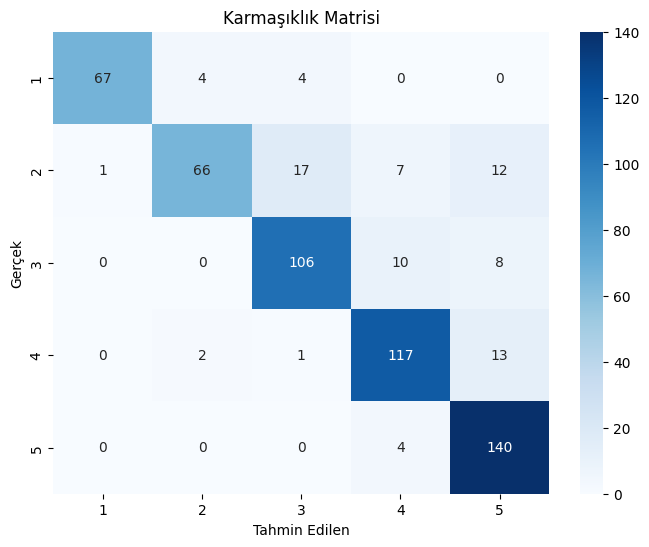

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Karmaşıklık matrisi oluşturma
cm = confusion_matrix(y_test, y_pred)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karmaşıklık Matrisi')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Örnek veriler: tfidf_ozellikler (özellikler), etiketler (hedef değişkenler)
# Önce eğitim ve geçerlilik setini oluştur
X_train_val, X_test, y_train_val, y_test = train_test_split(tfidf_ozellikler, etiketler, test_size=0.2, random_state=42)

# Eğitim setini ve doğrulama setini oluştur
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Eğitim ve doğrulama setlerinin boyutlarını kontrol etme
print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Doğrulama seti boyutu: {X_val.shape}")
print(f"Test seti boyutu: {X_test.shape}")


Eğitim seti boyutu: (1734, 2167)
Doğrulama seti boyutu: (579, 2167)
Test seti boyutu: (579, 2167)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Modeli oluştur ve eğitim verisiyle eğit
model = MultinomialNB()
model.fit(X_train, y_train)

# Doğrulama seti ile modelin performansını değerlendirme
y_val_pred = model.predict(X_val)
print("Doğrulama Seti Accuracy:", accuracy_score(y_val, y_val_pred))
print("Doğrulama Seti Classification Report:\n", classification_report(y_val, y_val_pred))

# Test seti ile modelin nihai performansını değerlendirme
y_test_pred = model.predict(X_test)
print("Test Seti Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Seti Classification Report:\n", classification_report(y_test, y_test_pred))


Doğrulama Seti Accuracy: 0.8169257340241797
Doğrulama Seti Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.86      0.90        66
           2       0.96      0.60      0.74        85
           3       0.84      0.79      0.82       126
           4       0.86      0.81      0.83       152
           5       0.70      0.95      0.80       150

    accuracy                           0.82       579
   macro avg       0.86      0.80      0.82       579
weighted avg       0.84      0.82      0.82       579

Test Seti Accuracy: 0.8341968911917098
Test Seti Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.92      0.95        75
           2       0.97      0.55      0.70       103
           3       0.81      0.85      0.83       124
           4       0.84      0.85      0.85       133
           5       0.74      0.97      0.84       144

    accuracy                 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# BI-RADS Veri Seti için Model Eğitimi ve Değerlendirme
X_train, X_test, y_train, y_test = train_test_split(tfidf_ozellikler, etiketler, test_size=0.2, random_state=42)

# Naive Bayes modelini tanımlayın
model_birads = MultinomialNB()

# Modeli eğitin
model_birads.fit(X_train, y_train)

# Modeli doğrulama setinde değerlendirin
y_pred_birads = model_birads.predict(X_test)
print("Doğrulama Seti Accuracy:", accuracy_score(y_test, y_pred_birads))
print("Doğrulama Seti Classification Report:\n", classification_report(y_test, y_pred_birads))


Doğrulama Seti Accuracy: 0.8566493955094991
Doğrulama Seti Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.89      0.94        75
           2       0.92      0.64      0.75       103
           3       0.83      0.85      0.84       124
           4       0.85      0.88      0.86       133
           5       0.81      0.97      0.88       144

    accuracy                           0.86       579
   macro avg       0.88      0.85      0.86       579
weighted avg       0.86      0.86      0.85       579



In [ ]:
# Tüm BIRADS Klasörlerini İşleyin ve metinleri saklayın
raporlar, etiketler, tfidf_ozellikler = tum_birads_klasorlerini_isle(birads_klasor_yollari)

# Eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(tfidf_ozellikler, etiketler, test_size=0.2, random_state=42)

# Test setinin orijinal metinlerini saklayın
X_test_raporlar = [raporlar[i] for i in X_test.indices]

# Modeli eğitin ve tahmin yapın
model_birads = MultinomialNB()
model_birads.fit(X_train, y_train)
birads_tahminleri = model_birads.predict(X_test)

# Tahminleri JSON dosyası olarak kaydedin
save_predictions_to_json(raporlar=X_test_raporlar, tahminler=birads_tahminleri)


Görüntülenen çıkış son 5000 satıra kısaltıldı.
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS2/213.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 213.txt, Etiket: 2
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS2/216.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 216.txt, Etiket: 2
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS2/215.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 215.txt, Etiket: 2
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS2/218.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 218.txt, Etiket: 2
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS2/214.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 214.txt, Etiket: 2
/content/drive/MyDrive/Colab Notebooks/NLP-Teknofest24/2000raporBIRADSgruplanmış/BIRADS2/217.txt dosyası UTF-8 kodlaması ile okundu.
Dosya: 217.txt, Eti

NameError: name 'train_test_split' is not defined

In [ ]:
import json

# Tahminleri JSON formatında kaydetme fonksiyonu
def save_predictions_to_json(raporlar, tahminler, filename="birads_tahminleri.json"):
    output_data = []
    for idx, (rapor, tahmin) in enumerate(zip(raporlar, tahminler)):
        output_data.append({
            "id": str(idx + 1),  # Eğer id'ler varsa onları kullanmalısınız
            "text": rapor,  # Eğer orijinal metinler elinizde varsa burada kullanılmalı
            "cats": {
                "1": 1.0 if tahmin == 1 else 0.0,
                "2": 1.0 if tahmin == 2 else 0.0,
                "3": 1.0 if tahmin == 3 else 0.0,
                "4": 1.0 if tahmin == 4 else 0.0,
                "5": 1.0 if tahmin == 5 else 0.0
            },
            "entities": []  # Bu alanı daha sonra dolduracaksınız
        })

    # Tahminleri JSON dosyası olarak kaydetme
    with open(filename, "w", encoding='utf-8') as f:
        json.dump(output_data, f, ensure_ascii=False, indent=2)

# Örnek kullanım
birads_tahminleri = model_birads.predict(X_test)
save_predictions_to_json(raporlar=X_test_raporlar, tahminler=birads_tahminleri)  # X_test_raporlar, orijinal metinler olmalıdır


NameError: name 'model_birads' is not defined

In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
import os
print(os.listdir(os.getcwd()))


['.config', 'birads_tahminleri.json', 'drive', 'sample_data']


In [ ]:
def save_predictions_to_json(raporlar, tahminler, dosya_adi="birads_tahminleri1.json"):
    import json
    output_data = [{"text": metin, "prediction": tahmin} for metin, tahmin in zip(raporlar, tahminler)]
    with open(dosya_adi, "w") as f:
        json.dump(output_data, f, indent=2)
    print(f"JSON dosyası '{dosya_adi}' olarak kaydedildi.")
